In [3]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint, solve_ivp, solve_bvp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig

In [4]:
def results():
    """Plot the actual population of ukraine since the beginning of the war versus our numerical method"""
    return_data = pd.read_csv('metadata-round-14-dtm-ukraine-returnees-dataset.csv')
    refugee_data = pd.read_csv('metadata-round-14-idp-estimation-25-september-2023.csv')
    useful = pd.read_csv('Ukraine Explorer Inputs Prod - RefugeesSeries.csv')
    return useful
    

In [7]:
useful = pd.read_csv('Ukraine Explorer Inputs Prod - RefugeesSeries.csv')
data = useful.iloc[1:,:]
data.RefugeesDate = pd.to_datetime(data.RefugeesDate)
data


/var/folders/9t/wltz5rw540dg7_k5xs930j_c0000gn/T/ipykernel_33541/60052716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.RefugeesDate = pd.to_datetime(data.RefugeesDate)


,RefugeesDate,NoRefugees
1,2022-04-25,85000
2,2022-04-27,128300
3,2022-05-03,165700
4,2022-05-09,180700
5,2022-05-18,180894
...,...,...
401,2023-11-05,5851604
402,2023-11-06,5851692
403,2023-11-07,5856217
404,2023-11-12,5855253


In [8]:
useful = pd.read_csv('Ukraine Explorer Inputs Prod - RefugeesSeries.csv')
data = useful.iloc[1:,:]
data['StartDate'] = data['RefugeesDate'].iloc[0]
data['StartDate'] = pd.to_datetime(data['StartDate'])


data.RefugeesDate = pd.to_datetime(data.RefugeesDate).copy()
data['TimeDifference'] = (data['RefugeesDate'] - data['StartDate']).dt.days / 30.44
data.set_index(['TimeDifference'],inplace=True)
data['NoRefugees'] = data['NoRefugees'].astype('int').copy()
n = 44e6
data['NoRefugees'] = (n - data['NoRefugees'])/n



/var/folders/9t/wltz5rw540dg7_k5xs930j_c0000gn/T/ipykernel_33541/1891233083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['StartDate'] = data['RefugeesDate'].iloc[0]
/var/folders/9t/wltz5rw540dg7_k5xs930j_c0000gn/T/ipykernel_33541/1891233083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['StartDate'] = pd.to_datetime(data['StartDate'])
/var/folders/9t/wltz5rw540dg7_k5xs930j_c0000gn/T/ipykernel_33541/1891233083.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

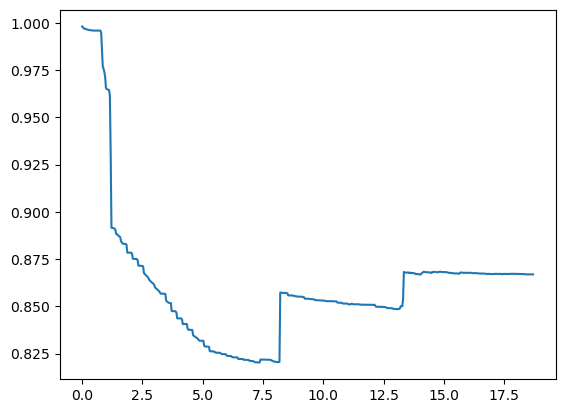

In [9]:
plt.plot(data.index, data.NoRefugees)
plt.show()

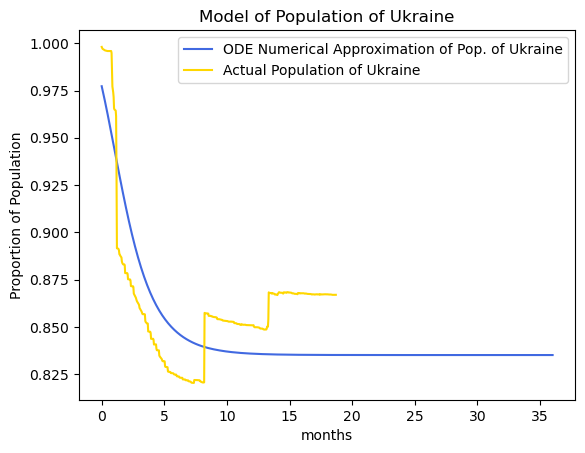

In [37]:
t0 = 0 
tf = 36
n = 44e6
beta=5
gamma=1/1.25
k = 34e6/n
c = 75e5/n
#define ode measuring the spread of disease
def ode(t,y): 
    if t <1:
        return np.array([beta*y[1]*y[0]*(1-y[0]/k),-beta*y[1]*y[0]*(1-y[0]/k)-gamma*y[1], gamma*y[1],0])
    else:
        return np.array([beta*y[1]*y[0]*(1-y[0]/k),-beta*y[1]*y[0]*(1-y[0]/k)-gamma*y[1], gamma*y[1] - c * y[2],c * y[2]])
#initial conditions
y0 = np.array([(n-1e6)/n,1e6/n,0, 0])
y0[3] = min(y0[3], 1 - y0[0])

#solve ivp and get solution
solution=solve_ivp(ode,(t0,tf), y0, t_eval=np.linspace(t0,tf,150))

#plots and labels
plt.plot(solution.t, solution.y[0],label="ODE Numerical Approximation of Pop. of Ukraine", color = 'royalblue')
# plt.plot(solution.t, solution.y[1],label="Leaving")
# plt.plot(solution.t, solution.y[2],'r',label="Out of Ukraine")
# plt.plot(solution.t, solution.y[3],'purple',label="Returned to Ukraine")
plt.plot(data.index, data.NoRefugees, label = 'Actual Population of Ukraine', color = 'gold')
plt.xlabel('months')
plt.title('Model of Population of Ukraine')
plt.ylabel('Proportion of Population')
plt.legend()
plt.savefig('Ukraine_Data.pdf')
plt.show()

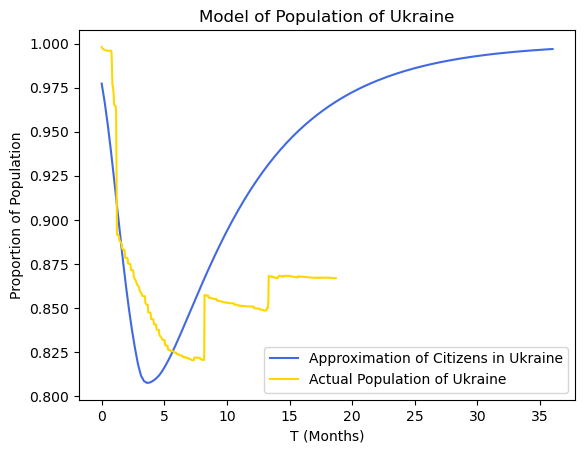

In [38]:
t0 = 0 
tf = 36
n = 44e6
beta=5
gamma=1/1.25
k = 31.5e6/n
c = 60e5/n
#define ode measuring the spread of disease
def ode(t,y): 
    if t <3:
        return np.array([beta*y[1]*y[0]*(1-y[0]/k),-beta*y[1]*y[0]*(1-y[0]/k)-gamma*y[1], gamma*y[1],0])
    else:
        return np.array([beta*y[1]*y[0]*(1-y[0]/k),-beta*y[1]*y[0]*(1-y[0]/k)-gamma*y[1], gamma*y[1] - c * y[2],c * y[2]])
#initial conditions
y0 = np.array([(n-1e6)/n,1e6/n,0, 0])
y0[3] = min(y0[3], 1 - y0[0])

#solve ivp and get solution
solution=solve_ivp(ode,(t0,tf), y0, t_eval=np.linspace(t0,tf,150))

#plots and labels
plt.plot(solution.t, solution.y[0]+solution.y[3],label="Approximation of Citizens in Ukraine", color = 'royalblue')
# plt.plot(solution.t, solution.y[1],label="Citizens Moving")
# plt.plot(solution.t, solution.y[2],'green',label="Citizens out of the Country")
plt.plot(data.index, data.NoRefugees, label = 'Actual Population of Ukraine', color = 'gold')
# plt.plot(solution.t, solution.y[3],'purple',label="Returned to Ukraine")
plt.xlabel('T (Months)')
plt.title('Model of Population of Ukraine')
plt.ylabel('Proportion of Population')
plt.legend()
plt.savefig('Ukraine_Data_2.pdf')
plt.show()